# Hyperparameter Tuning

#### A hyperparameter optimization framework [optuna](https://optuna.readthedocs.io/en/stable/index.html)

#### In this tutorial we'll gonna to explore a little bit about how to use **Bayesian Search** to Hyperparameter Tuning with a trivial example. This strategy will be used in others projects in my git

In [8]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.4 MB/s eta 0:00:00


In [69]:
# Importando bibliotecas
import optuna
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


# Creating a Custom Classification Dataset

####. $1000$ samples  
####. $20$ features

#### Dataset type = *numpy.ndarray*;

In [61]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)

# Correlation Between the Features


#### Creating the Dataframe

In [63]:
df = {}
for i in range(len(X[0])):
  df[f'f{i}'] = X[:, i]

df = pd.DataFrame(df)

In [65]:
df.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19
0,-0.496932,-0.339122,0.229146,-0.182569,-1.041103,0.421546,-1.015179,0.767666,-1.633819,-0.453981,-0.123733,0.123134,0.977832,0.370061,0.266818,0.153306,-0.320119,-1.179273,0.457806,0.356006
1,0.012499,1.007444,0.140096,2.868403,-2.123507,-1.280456,-1.323388,1.420631,-2.725525,-1.325920,0.184710,-0.054783,1.852633,-1.254923,0.189480,0.277478,-0.199386,-1.763853,0.937916,0.459363
2,-0.720212,-1.244486,-0.472291,-1.125655,-0.729670,1.010840,0.733484,0.257335,0.028566,-1.091580,-0.707552,-0.505305,0.411076,0.449827,3.529055,0.039350,0.652697,0.413948,-0.538790,-0.266361
3,-0.697364,-0.082698,-0.512911,1.138150,2.297500,-2.072355,2.256809,-1.697290,3.618918,0.993004,0.359055,-0.278493,-2.161010,1.136191,0.154032,-0.339092,0.716461,2.616592,1.334229,-0.791529
4,-0.202339,-1.553035,-0.090793,-0.183245,0.664007,-0.326614,0.521091,-0.465061,0.939386,0.357189,-0.083783,-0.026790,-0.599667,-1.403559,1.985380,-0.091821,0.127459,0.643637,2.254038,-0.181938


In [66]:
df.shape

(1000, 20)

In [68]:
df.describe()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.021696,0.046163,0.016547,-0.056545,-0.022545,-0.047411,-0.048433,0.021762,-0.056863,0.004325,-0.026304,0.013495,0.026195,-0.015913,-0.014444,0.004566,-0.022986,-0.048243,0.042489,0.017152
std,1.034678,0.995697,0.621347,0.974834,1.403956,0.997860,1.322137,0.835073,1.605916,1.455661,1.022877,0.637043,1.112325,1.015476,1.006044,0.160886,0.859768,1.246945,1.001158,0.471226
min,-3.836656,-3.241514,-1.821802,-3.044657,-4.543441,-3.922400,-3.836929,-2.834868,-5.290890,-3.329870,-3.007632,-1.825736,-3.591916,-3.601085,-3.688365,-0.568889,-3.052896,-3.402745,-2.854627,-1.402946
25%,-0.731125,-0.603195,-0.389557,-0.712035,-1.054538,-0.709421,-1.021008,-0.530734,-1.027733,-1.134340,-0.708022,-0.317567,-0.741650,-0.721314,-0.687481,-0.097278,-0.426297,-0.982528,-0.637034,-0.350900
50%,-0.015089,0.047983,0.065011,-0.060632,-0.197133,-0.072086,-0.224366,0.137345,-0.085905,0.037045,-0.026896,-0.016769,0.183434,-0.010065,0.007264,0.019694,-0.091926,-0.122506,0.065265,0.080581
75%,0.663078,0.706424,0.306978,0.625647,0.990549,0.627625,0.969732,0.551479,0.862870,0.696928,0.641832,0.269461,0.743971,0.688088,0.687644,0.103518,0.538561,0.801488,0.683248,0.360731
max,3.377383,3.243093,2.207528,3.109919,4.020262,2.949094,3.994644,2.874452,6.165314,4.910834,3.157771,2.286217,3.789084,3.112910,3.529055,0.556762,2.521178,4.540076,3.926238,1.385520


# Looking at the Correlation between the Features

<Axes: >

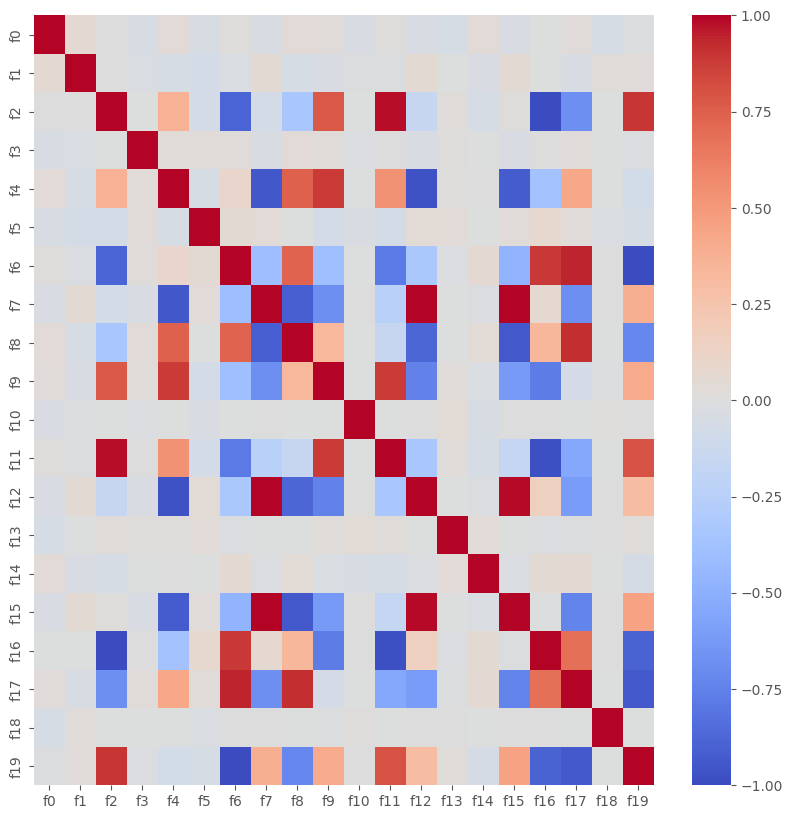

In [85]:
plt.figure(figsize=(10, 10))

sns.heatmap(
  df.corr(),
  vmin=-1,
  cmap='coolwarm',
  annot=False
)

# Split the dataset - $20\%$ test | $80\%$ train

In [74]:
# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
X_train.shape

(800, 20)

#### *cross_val_score* docs: [docs](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

In [76]:
# Define an objective function to be maximized.
def objective(trial):
  # trial type: <class 'optuna.trial._trial.Trial'>

  # Defining a random value for the target hyperparameters
  n_estimators = trial.suggest_int('n_estimators', 10, 100)
  max_depth = trial.suggest_int('max_depth', 1, 5)

  # Creating the model with it hyperparameters
  model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)

  # Score = Via Cross Validation - Folds = 3 -> mean
  score = cross_val_score(model, X_train, y_train, n_jobs=-1, cv=3).mean()

  return score

In [77]:
# Criando o estudo do Optuna e buscando os melhores hiperparâmetros
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

[I 2024-07-22 23:46:36,042] A new study created in memory with name: no-name-ac18df5c-e769-46db-803c-7771455d7857
[I 2024-07-22 23:46:37,571] Trial 0 finished with value: 0.8475401988116359 and parameters: {'n_estimators': 53, 'max_depth': 1}. Best is trial 0 with value: 0.8475401988116359.
[I 2024-07-22 23:46:38,071] Trial 1 finished with value: 0.9075075328771366 and parameters: {'n_estimators': 85, 'max_depth': 4}. Best is trial 1 with value: 0.9075075328771366.
[I 2024-07-22 23:46:38,526] Trial 2 finished with value: 0.8912684332554232 and parameters: {'n_estimators': 78, 'max_depth': 3}. Best is trial 1 with value: 0.9075075328771366.
[I 2024-07-22 23:46:38,871] Trial 3 finished with value: 0.8887762477354434 and parameters: {'n_estimators': 60, 'max_depth': 3}. Best is trial 1 with value: 0.9075075328771366.
[I 2024-07-22 23:46:39,259] Trial 4 finished with value: 0.8450433199102626 and parameters: {'n_estimators': 65, 'max_depth': 1}. Best is trial 1 with value: 0.90750753287713

In [78]:
# Melhores hiperparâmetros encontrados
best_params = study.best_params
best_score = study.best_value

print("Best Hyperparameters: ", best_params)
print("Best Score Train: ", best_score)

Best Hyperparameters:  {'n_estimators': 54, 'max_depth': 5}
Best Score Train:  0.9162653825575173


# Creating the \"Best Model\" found

In [79]:
rf = RandomForestClassifier(
  n_estimators=best_params['n_estimators'],
  max_depth=best_params['max_depth'],
  random_state=42
)

In [80]:
rf.fit(X_test, y_test)

RandomForestClassifier(max_depth=5, n_estimators=54, random_state=42)

In [81]:
y_pred = rf.predict(X_test)

In [82]:
rf_accuracy   = accuracy_score(y_pred=y_pred, y_true=y_test)
rf_precision  = precision_score(y_pred=y_pred, y_true=y_test)
rf_recall     = recall_score(y_pred=y_pred, y_true=y_test)
rf_auc        = roc_auc_score(y_score=y_pred, y_true=y_test)

print(f'[+] Accuracy:  {rf_accuracy:.4f}')
print(f'[+] Precision: {rf_precision:.4f}')
print(f'[+] Recall:    {rf_recall:.4f}')
print(f'[+] ROC AUC:   {rf_auc:.4f}')

[+] Accuracy:  0.9850
[+] Precision: 0.9778
[+] Recall:    0.9888
[+] ROC AUC:   0.9854


# Confustion Matrix

<Figure size 640x480 with 0 Axes>

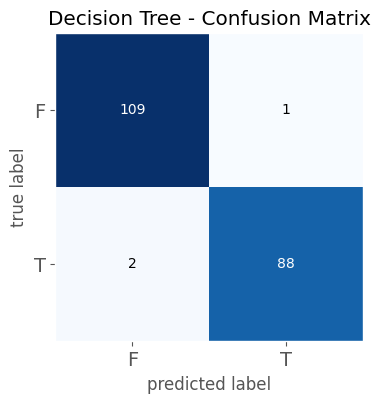

In [84]:
cm = confusion_matrix(y_pred, y_test)
plt.figure()
plot_confusion_matrix(cm, figsize=(6,4), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Decision Tree - Confusion Matrix")
plt.xticks(range(2), ["F", "T"], fontsize=14)
plt.yticks(range(2), ["F", "T"], fontsize=14)
plt.show()